In [1]:
from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt
import random

-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
Status = OPTIMAL
Number of solutions found: 5


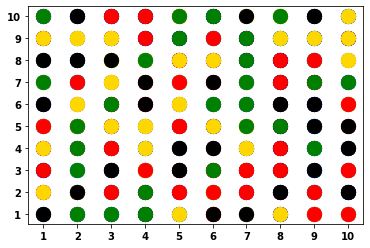

In [2]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""
    def __init__(self, variables,points):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0
        self.__dic = points
    def on_solution_callback(self):
        self.__solution_count += 1
        print('-------------------------')
        KOLOR= ['r','dodgerblue','g','k','gold','navy']
        random.shuffle(KOLOR)
        for (p,c) in self.__variables:
            if self.Value(self.__variables[p,c]) >0:
                [i,j] = self.__dic[p]
                plt.scatter(i,j , c=KOLOR[c-1], s=200)
        maxi= max([self.__dic[p][0] for p in self.__dic ])
        maxj= max([self.__dic[p][1] for p in self.__dic ])
        plt.xticks(range(1,maxi+1),fontweight='bold')
        plt.yticks(range(1,maxj+1),fontweight='bold')     
        plt.savefig(f'Vertex_{maxi}_{maxj}.png', format='png', dpi=500)

        
    def solution_count(self):
        return self.__solution_count

def SearchForAllSolutionsSampleSat(N,M,C):
    """Showcases calling the solver to search for all solutions."""
    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    rows = range(1,N+1)
    cols = range(1,M+1)
    colors = range(1,1+C)
    #x = {(i,j):model.NewIntVar(1, c, f"x_{i}_{j}") for i in rows for j in cols}
    
    points = {}
    counter = 0 
    for i in rows:
        for j in cols:
            counter+=1
            points[counter] = [i,j]
    
    
    x = {(p,c):model.NewBoolVar(f"x_{p}_{c}") for p in points for c in colors}
    
    
    for p in points:
        model.AddExactlyOne([x[p,c] for c in colors])
    dic= {(points[p][0],points[p][1]):p for p in points}
    
    
    keep = []
    for p1 in points:
        for p2 in points:
            [i,j] =points[p1]
            [m,n] =points[p2]
            if p1!=p2 and m<i and n<j:
                keep.append([dic[m,n], dic[m,j] ,dic[i,n] , dic[i,j]])
            elif p1!=p2 and m>i and n>j:
                keep.append([dic[i,j],dic[i,n],dic[m,j] ,dic[m,n]])

    for c in colors:
        for K in keep:
            expression = [x[p,c] for p in K]
            model.Add(sum(expression) <= 3)

    lb= sum(c*x[dic[1,col],c] for c in colors for col in cols)
    rb= sum(c*x[dic[N,col],c] for c in colors for col in cols)
    ul= sum(c*x[dic[r,M],c] for c in colors for r in rows)
    ur= sum(c*x[dic[r,1],c] for c in colors for r in rows)
    
    model.Add(lb<=rb)
    model.Add(ul<=ur)
    model.Add(ul+ur <= lb+rb)
    
    # Create a solver and solve.
    solver = cp_model.CpSolver()
    solution_printer = VarArraySolutionPrinter(x,points)
    # Enumerate all solutions.
    solver.parameters.enumerate_all_solutions = False
    solver.parameters.num_search_workers = 16
    #sub_solver=['core', 'pseudo_costs']
    #solver.parameters.subsolvers[:] = sub_solver
            

    # Solve.
    
    status = solver.Solve(model, solution_printer)
    #status = solver.Solve(model)

    print(f"Status = {solver.StatusName(status)}")
    print(f"Number of solutions found: {solution_printer.solution_count()}")

SearchForAllSolutionsSampleSat(10,10,4)

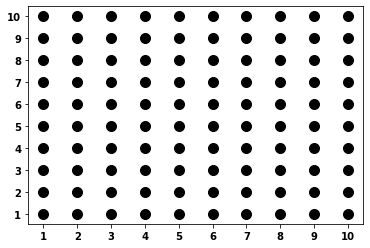

In [3]:
n,m =10, 10 
rows = range(1,n+1)
cols = range(1,m+1)

for r in rows:
    for c in cols:
        plt.scatter(r,c,s=100,c='k')
plt.xticks(range(1,n+1),fontweight='bold')
plt.yticks(range(1,m+1),fontweight='bold')     
plt.savefig(f'Vertex_black.png', format='png', dpi=500)